<a href="https://colab.research.google.com/github/descartesmbogning/immune-checkpoint-therapy-patent-analysis/blob/main/Patent_TopicModeling_immune_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# data import and preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install pyLDAvis==3.4.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 12.1 MB/s eta 0:00:00


In [ ]:
import pyLDAvis
import pyLDAvis.sklearn

In [ ]:

import spacy
import codecs
import re
from wordcloud import STOPWORDS

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition
from nltk.stem.porter import PorterStemmer

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv ('/content/drive/Othercomputers/My laptop/D:/PROJECT/YORK UNIVERSITY/Immune checkpoint /DATA/LENS.ORG/immune-checkpoint-petent-lensorg-28012024.csv')
pd.set_option('display.max_columns', None)
print(len(df))
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3439


,#,Jurisdiction,Kind,Display Key,Lens ID,Publication Date,Publication Year,Application Number,Application Date,Priority Numbers,Earliest Priority Date,Title,Abstract,Applicants,Inventors,Owners,URL,Document Type,Has Full Text,Cites Patent Count,Cited by Patent Count,Simple Family Size,Extended Family Size,Sequence Count,CPC Classifications,IPCR Classifications,US Classifications,NPL Citation Count,NPL Resolved Citation Count,NPL Resolved Lens ID(s),NPL Resolved External ID(s),NPL Citations,Legal Status
0,1,TW,A,TW 202114659 A,197-733-628-711-768,2021-04-16,2021,TW 109133847 A,2020-09-29,EP 19201152 A,2019-10-02,"Combination comprising HDAC inhibitor, CTLA-4 ...",The invention relates to medical uses of an HD...,4SC AG,HAMM SVETLANA;;HERMANN FRANK,NaN,https://lens.org/197-733-628-711-768,Patent of Addition,no,0,0,2,2,0,A61K45/06;;A61P35/00;;A61K31/4155,A61K31/4155;;A61K39/395;;A61K45/06;;A61P35/00,NaN,0,0,NaN,NaN,NaN,PENDING
1,2,WO,A1,WO 2022/056572 A1,023-616-950-865-48X,2022-03-24,2022,AU 2020/050994 W,2020-09-18,AU 2020/050994 W,2020-09-18,TREATMENT OF SOLID TUMOURS,The present invention relates to a method for ...,OLIVIA NEWTON JOHN CANCER RES INSTITUTE,POH ASHLEIGH REN-YI;;ERNST MATTHIAS ROBERT WALTER,NaN,https://lens.org/023-616-950-865-48X,Patent Application,yes,3,0,1,2,0,A61K31/506;;A61K2300/00;;A61K31/519;;A61K9/001...,A61K31/506;;A61K31/519;;A61K39/395;;A61P35/00;...,NaN,2,2,011-457-792-548-92X;;048-229-382-653-004,29955905;;10.1007/s00018-018-2863-3;;pmc638240...,"YU, G.-T. ET AL.: ""Inhibition of SRC family ki...",PENDING
2,3,CN,A,CN 112512579 A,094-569-953-648-612,2021-03-16,2021,CN 201980049832 A,2019-09-27,CN 201811147946 A;;CN 201910467950 A;;CN 20191...,2018-09-29,USE OF COMBINATION OF TLR AGONIST AND IMMUNE C...,Use of a combination of a TLR agonist and an i...,JIANGSU HENGRUI MEDICINE CO;;SUZHOU SHENGDIYA ...,JIANG JIAHUA;;YANG CHANGYONG;;LIAO CHENG;;ZHAN...,NaN,https://lens.org/094-569-953-648-612,Patent Application,no,3,0,3,3,0,A61K39/395;;A61P35/00;;A61K31/395;;C07D471/04,A61K39/395;;A61K31/395;;A61P35/00;;C07D471/04,NaN,0,0,NaN,NaN,NaN,PENDING
3,4,CN,A,CN 112512580 A,143-969-408-220-424,2021-03-16,2021,CN 201980049896 A,2019-09-27,CN 201811149357 A;;CN 201811547685 A;;CN 20191...,2018-09-29,USE OF EZH2 INHIBITOR IN COMBINATION WITH IMMU...,Disclosed is the use of an EZH2 inhibitor in c...,JIANGSU HENGRUI MEDICINE CO;;SUZHOU SHENGDIYA ...,ZHANG LAN;;JIANG JIAHUA;;LIAO CHENG;;ZHANG LIA...,NaN,https://lens.org/143-969-408-220-424,Patent Application,no,2,1,3,3,0,A61K31/4433;;A61K31/4545;;A61K31/496;;A61K31/5...,A61K39/395;;A61K31/4433;;A61K31/4545;;A61K31/4...,NaN,0,0,NaN,NaN,NaN,PENDING
4,5,WO,A8,WO 2019/156568 A8,194-887-353-832-386,2019-10-03,2019,NL 2019050092 W,2019-02-12,NL 2020422 A,2018-02-12,METHODS FOR PREDICTING TREATMENT OUTCOME AND/O...,The present invention relates to the field of ...,STICHTING HET NEDERLANDS KANKER INST ANTONI VA...,SCHUMACHER ANTONIUS NICOLAAS MARIA;;ZIPPELIUS ...,NaN,https://lens.org/194-887-353-832-386,Amended Application,yes,0,0,3,3,0,G01N33/57423;;G01N2333/70532,G01N33/574,NaN,0,0,NaN,NaN,NaN,PENDING


In [ ]:
## Convert 'Publication Year' to integers
df['Publication Year'] = df['Publication Year'].astype(int)

# Filter based on 'Publication Year' column
#df = df[df['Publication Year'] >= 2003]
len(df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3439

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df = df[(~pd.isnull(df['Abstract'])) & (~pd.isnull(df['Title']))]
len(df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3378

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df = df.set_index(['Lens ID','Publication Year'])
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,,#,Jurisdiction,Kind,Display Key,Publication Date,Application Number,Application Date,Priority Numbers,Earliest Priority Date,Title,Abstract,Applicants,Inventors,Owners,URL,Document Type,Has Full Text,Cites Patent Count,Cited by Patent Count,Simple Family Size,Extended Family Size,Sequence Count,CPC Classifications,IPCR Classifications,US Classifications,NPL Citation Count,NPL Resolved Citation Count,NPL Resolved Lens ID(s),NPL Resolved External ID(s),NPL Citations,Legal Status
Lens ID,Publication Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
197-733-628-711-768,2021,1,TW,A,TW 202114659 A,2021-04-16,TW 109133847 A,2020-09-29,EP 19201152 A,2019-10-02,"Combination comprising HDAC inhibitor, CTLA-4 ...",The invention relates to medical uses of an HD...,4SC AG,HAMM SVETLANA;;HERMANN FRANK,NaN,https://lens.org/197-733-628-711-768,Patent of Addition,no,0,0,2,2,0,A61K45/06;;A61P35/00;;A61K31/4155,A61K31/4155;;A61K39/395;;A61K45/06;;A61P35/00,NaN,0,0,NaN,NaN,NaN,PENDING
023-616-950-865-48X,2022,2,WO,A1,WO 2022/056572 A1,2022-03-24,AU 2020/050994 W,2020-09-18,AU 2020/050994 W,2020-09-18,TREATMENT OF SOLID TUMOURS,The present invention relates to a method for ...,OLIVIA NEWTON JOHN CANCER RES INSTITUTE,POH ASHLEIGH REN-YI;;ERNST MATTHIAS ROBERT WALTER,NaN,https://lens.org/023-616-950-865-48X,Patent Application,yes,3,0,1,2,0,A61K31/506;;A61K2300/00;;A61K31/519;;A61K9/001...,A61K31/506;;A61K31/519;;A61K39/395;;A61P35/00;...,NaN,2,2,011-457-792-548-92X;;048-229-382-653-004,29955905;;10.1007/s00018-018-2863-3;;pmc638240...,"YU, G.-T. ET AL.: ""Inhibition of SRC family ki...",PENDING
094-569-953-648-612,2021,3,CN,A,CN 112512579 A,2021-03-16,CN 201980049832 A,2019-09-27,CN 201811147946 A;;CN 201910467950 A;;CN 20191...,2018-09-29,USE OF COMBINATION OF TLR AGONIST AND IMMUNE C...,Use of a combination of a TLR agonist and an i...,JIANGSU HENGRUI MEDICINE CO;;SUZHOU SHENGDIYA ...,JIANG JIAHUA;;YANG CHANGYONG;;LIAO CHENG;;ZHAN...,NaN,https://lens.org/094-569-953-648-612,Patent Application,no,3,0,3,3,0,A61K39/395;;A61P35/00;;A61K31/395;;C07D471/04,A61K39/395;;A61K31/395;;A61P35/00;;C07D471/04,NaN,0,0,NaN,NaN,NaN,PENDING
143-969-408-220-424,2021,4,CN,A,CN 112512580 A,2021-03-16,CN 201980049896 A,2019-09-27,CN 201811149357 A;;CN 201811547685 A;;CN 20191...,2018-09-29,USE OF EZH2 INHIBITOR IN COMBINATION WITH IMMU...,Disclosed is the use of an EZH2 inhibitor in c...,JIANGSU HENGRUI MEDICINE CO;;SUZHOU SHENGDIYA ...,ZHANG LAN;;JIANG JIAHUA;;LIAO CHENG;;ZHANG LIA...,NaN,https://lens.org/143-969-408-220-424,Patent Application,no,2,1,3,3,0,A61K31/4433;;A61K31/4545;;A61K31/496;;A61K31/5...,A61K39/395;;A61K31/4433;;A61K31/4545;;A61K31/4...,NaN,0,0,NaN,NaN,NaN,PENDING
194-887-353-832-386,2019,5,WO,A8,WO 2019/156568 A8,2019-10-03,NL 2019050092 W,2019-02-12,NL 2020422 A,2018-02-12,METHODS FOR PREDICTING TREATMENT OUTCOME AND/O...,The present invention relates to the field of ...,STICHTING HET NEDERLANDS KANKER INST ANTONI VA...,SCHUMACHER ANTONIUS NICOLAAS MARIA;;ZIPPELIUS ...,NaN,https://lens.org/194-887-353-832-386,Amended Application,yes,0,0,3,3,0,G01N33/57423;;G01N2333/70532,G01N33/574,NaN,0,0,NaN,NaN,NaN,PENDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
042-723-456-628-924,2023,3433,US,A1,US 2023/0070723 A1,2023-03-09,US 202217819401 A,2022-08-12,US 202217819401 A;;US 202163232966 P,2021-08-13,COMBINATION THERAPY TO TREAT BRAIN CANCER,Provided herein are methods of treating brain ...,INOVIO PHARMACEUTICALS INC;;REGENERON PHARMA,BREDLAU AMY-LEE;;LOWY ISRAEL;;SKOLNIK JEFFREY;...,NaN,https://lens.org/042-723-456-628-924,Patent Application,yes,0,0,3,3,0,C07K16/2818;;A61K39/001195;;A61K39/001157;;A61...,A61K31/495;;A61K38/20;;A61K39/00;;A61K39/395;;...,NaN,0,0,NaN,NaN,NaN,PENDING
166-510-410-954-06X,2023,3436,WO,A1,WO 2023/224912 A1,2023-11-23,US 2023/0022243 W,2023-05-15,US 202263342548 P,2022-05-16,METHODS OF TREATING METASTATIC CASTRATION-RESI...,The present disclosure provide

In [ ]:
#data = [str(df['Title'][i])+str(df['Abstract'][i]) for i in df.index] #Title and Abstract
len(data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3378

In [ ]:
#data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!python -m spacy download en_core_web_md

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 19.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [ ]:
import en_core_web_md
nlp = en_core_web_md.load()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import nltk
nltk.download('punkt')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


from wordcloud import WordCloud, STOPWORDS
import plotly.express as px
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('stopwords')
s = set(STOPWORDS)
sw = stopwords.words('english')
sw += s
sw.append ('amp')

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Downloads
nltk.download('wordnet')
nltk.download('stopwords')

# Initialize your stopwords set with wordcloud's stopwords
s = set(STOPWORDS)

# Get stopwords for all languages in NLTK
languages = stopwords.fileids()
for language in languages:
    s.update(stopwords.words(language))

# Add any additional stopwords if needed
s.add('amp')

# If you really need the resulting stopwords as a list:
sw = list(s)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Read the texts and remove the stopwords :
#Build the text list:
txt = []
idx = []
t1 = ''
t2 = []
for i in range(len(data)):
        t1 = str(data[i]).lower()
 #       t1 = re.sub ('#','',t1)
        #t1 = re.sub ('.','',t1)
 #       t1 = re.sub (',','',t1)
 #       t1 = re.sub ("'",'',t1)
#        t1 = t1.replace('.','')
        t2 = t1.split()
        t1 = ''
        for item2 in t2:
            if item2 not in sw:
                t1 += item2
                t1 += ' '
        if t1[:-1] not in txt and t1[:-1] != '':
            txt.append (t1[:-1])
            idx.append (i)
len (txt)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3320

In [ ]:
#pip install --upgrade ipykernel

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
idx

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,

In [ ]:
#txt

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(type(txt))

<class 'list'>


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

# Assume df is your original DataFrame
# Remove rows where either 'Abstract' or 'Title' is null
df = df.dropna(subset=['Abstract', 'Title'])

# Generate the data list combining 'Title' and 'Abstract'
data = [str(df['Title'].iloc[i]) + str(df['Abstract'].iloc[i]) for i in range(len(df))]

## Download necessary NLTK resources
#nltk.download('wordnet')
#nltk.download('stopwords')

## Generate a list of stopwords
#s = set(STOPWORDS)
#sw = set(stopwords.words('english'))
#sw |= s
#sw.add('amp')

# Initialize a list to store cleaned texts
cleaned_texts = []

# Text preprocessing
for text in data:
    words = text.lower().split()
    cleaned_words = [word for word in words if word not in sw]
    cleaned_text = ' '.join(cleaned_words)
    cleaned_texts.append(cleaned_text)

# Add the cleaned texts back to the original DataFrame
df['Cleaned_Text'] = cleaned_texts
len(df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3378

In [ ]:
# Drop rows where 'Cleaned_Text' is null
df_filtered = df.dropna(subset=['Cleaned_Text'])

# Keep only the rows with unique 'Cleaned_Text'
df_filtered = df_filtered.drop_duplicates(subset=['Cleaned_Text'])
df_filtered

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,,#,Jurisdiction,Kind,Display Key,Publication Date,Application Number,Application Date,Priority Numbers,Earliest Priority Date,Title,Abstract,Applicants,Inventors,Owners,URL,Document Type,Has Full Text,Cites Patent Count,Cited by Patent Count,Simple Family Size,Extended Family Size,Sequence Count,CPC Classifications,IPCR Classifications,US Classifications,NPL Citation Count,NPL Resolved Citation Count,NPL Resolved Lens ID(s),NPL Resolved External ID(s),NPL Citations,Legal Status,Cleaned_Text
Lens ID,Publication Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
197-733-628-711-768,2021,1,TW,A,TW 202114659 A,2021-04-16,TW 109133847 A,2020-09-29,EP 19201152 A,2019-10-02,"Combination comprising HDAC inhibitor, CTLA-4 ...",The invention relates to medical uses of an HD...,4SC AG,HAMM SVETLANA;;HERMANN FRANK,NaN,https://lens.org/197-733-628-711-768,Patent of Addition,no,0,0,2,2,0,A61K45/06;;A61P35/00;;A61K31/4155,A61K31/4155;;A61K39/395;;A61K45/06;;A61P35/00,NaN,0,0,NaN,NaN,NaN,PENDING,"combination comprising hdac inhibitor, ctla-4 ..."
023-616-950-865-48X,2022,2,WO,A1,WO 2022/056572 A1,2022-03-24,AU 2020/050994 W,2020-09-18,AU 2020/050994 W,2020-09-18,TREATMENT OF SOLID TUMOURS,The present invention relates to a method for ...,OLIVIA NEWTON JOHN CANCER RES INSTITUTE,POH ASHLEIGH REN-YI;;ERNST MATTHIAS ROBERT WALTER,NaN,https://lens.org/023-616-950-865-48X,Patent Application,yes,3,0,1,2,0,A61K31/506;;A61K2300/00;;A61K31/519;;A61K9/001...,A61K31/506;;A61K31/519;;A61K39/395;;A61P35/00;...,NaN,2,2,011-457-792-548-92X;;048-229-382-653-004,29955905;;10.1007/s00018-018-2863-3;;pmc638240...,"YU, G.-T. ET AL.: ""Inhibition of SRC family ki...",PENDING,treatment solid tumoursthe present invention r...
094-569-953-648-612,2021,3,CN,A,CN 112512579 A,2021-03-16,CN 201980049832 A,2019-09-27,CN 201811147946 A;;CN 201910467950 A;;CN 20191...,2018-09-29,USE OF COMBINATION OF TLR AGONIST AND IMMUNE C...,Use of a combination of a TLR agonist and an i...,JIANGSU HENGRUI MEDICINE CO;;SUZHOU SHENGDIYA ...,JIANG JIAHUA;;YANG CHANGYONG;;LIAO CHENG;;ZHAN...,NaN,https://lens.org/094-569-953-648-612,Patent Application,no,3,0,3,3,0,A61K39/395;;A61P35/00;;A61K31/395;;C07D471/04,A61K39/395;;A61K31/395;;A61P35/00;;C07D471/04,NaN,0,0,NaN,NaN,NaN,PENDING,combination tlr agonist immune checkpoint inhi...
143-969-408-220-424,2021,4,CN,A,CN 112512580 A,2021-03-16,CN 201980049896 A,2019-09-27,CN 201811149357 A;;CN 201811547685 A;;CN 20191...,2018-09-29,USE OF EZH2 INHIBITOR IN COMBINATION WITH IMMU...,Disclosed is the use of an EZH2 inhibitor in c...,JIANGSU HENGRUI MEDICINE CO;;SUZHOU SHENGDIYA ...,ZHANG LAN;;JIANG JIAHUA;;LIAO CHENG;;ZHANG LIA...,NaN,https://lens.org/143-969-408-220-424,Patent Application,no,2,1,3,3,0,A61K31/4433;;A61K31/4545;;A61K31/496;;A61K31/5...,A61K39/395;;A61K31/4433;;A61K31/4545;;A61K31/4...,NaN,0,0,NaN,NaN,NaN,PENDING,ezh2 inhibitor combination immune checkpoint i...
194-887-353-832-386,2019,5,WO,A8,WO 2019/156568 A8,2019-10-03,NL 2019050092 W,2019-02-12,NL 2020422 A,2018-02-12,METHODS FOR PREDICTING TREATMENT OUTCOME AND/O...,The present invention relates to the field of ...,STICHTING HET NEDERLANDS KANKER INST ANTONI VA...,SCHUMACHER ANTONIUS NICOLAAS MARIA;;ZIPPELIUS ...,NaN,https://lens.org/194-887-353-832-386,Amended Application,yes,0,0,3,3,0,G01N33/57423;;G01N2333/70532,G01N33/574,NaN,0,0,NaN,NaN,NaN,PENDING,methods predicting treatment outcome and/or se...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
042-723-456-628-924,2023,3433,US,A1,US 2023/0070723 A1,2023-03-09,US 202217819401 A,2022-08-12,US 202217819401 A;;US 202163232966 P,2021-08-13,COMBINATION THERAPY TO TREAT BRAIN CANCER,Provided herein are methods of treating brain ...,INOVIO PHARMACEUTICALS INC;;REGENERON PHARMA,BREDLAU AMY-LEE;;LOWY ISRAEL;;SKOLNIK JEFFREY;...,NaN,https://lens.org/042-723-456-628-924,Patent Application,yes,0,0,3,3,0,C07K16/2818;;A61K39/001195;;A61K39/001157;;A61...,A61K31/495;

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
text = df['Cleaned_Text'].tolist()
text

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['combination comprising hdac inhibitor, ctla-4 inhibitor pd-1 inhibitor pd-l1 inhibitor cancer treatmentthe invention relates medical hdac inhibitor general formula i, r1 r7 described herein, salt solvate thereof combination ctla-4 inhibitor pd-1 inhibitor pd-l1 inhibitor treatment cancer.',
 'treatment solid tumoursthe present invention relates method treatment cancer, particular colorectal cancer (colon cancer), comprising administering effective amount dasatinib subject; administering effective amount immune checkpoint inhibitor subject. preferably immune checkpoint inhibitor selected group consisting pd-1 inhibitor, pd-l1 inhibitor ctla-4 inhibitor, pembrolizumab, nivolumab, cemiplimab, atezolizumab, avelumab, durvalumab ipilimumab.',
 'combination tlr agonist immune checkpoint inhibitor preparation drugs treating tumorsuse combination tlr agonist immune checkpoint inhibitor preparation drugs treating tumors. specifically, tlr agonist compound formula (i) pharmacologicallyacceptab

In [ ]:
def lemmatization (texts, allowed_postags=['NOUN','ADJ','VERB']):
    texts_out = []
    for text in texts:
        doc = nlp(text)
        new_text = []
        for token in doc:
            if token.pos_ in allowed_postags:
                new_text.append (token.lemma_)
        final = " ".join(new_text)
        texts_out.append (final)
    return (texts_out)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
txt = lemmatization (txt)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Tokenization
def tokenize (texts):
    tokens = [word for word in nltk.word_tokenize(texts) if len(word) > 2]
    return tokens

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
tok = []
for item in txt:
  tok.append (tokenize (item))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# ... [your previous code to create the set 's' of stopwords] ...

# Using the set 's' as stopwords for TfidfVectorizer
vectorizer_tf = TfidfVectorizer(tokenizer=tokenize, stop_words=list(s), max_df=0.75, min_df=50, use_idf=False, norm=None)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#vectorizer_tf = TfidfVectorizer (tokenizer=tokenize, stop_words='english', max_df=0.75, min_df=50,  use_idf=False, norm=None) #max_features=10000,

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df1 = pd.DataFrame(data={'Text':txt})
tf_vectors = vectorizer_tf.fit_transform (df1['Text'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'ll", "'re", "'ve", 'aldiz', 'baizik', 'bukatzeko', 'edota', 'eze', 'ezpabere', 'ezpada', 'ezperen', 'gainera', 'gainerontzean', 'guztiz', 'hainbestez', 'horra', "n't", 'onların', 'ordea', 'osterantzean', 'sha', 'агар-чи', 'аз-баски', 'афташ', 'бале', 'баҳри

In [ ]:
#data.to_frame()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Text
0,combination comprise inhibitor ctla-4 inhibito...
1,treatment solid present invention relate metho...
2,combination agonist immune checkpoint inhibito...
3,inhibitor combination immune checkpoint inhibi...
4,method predict treatment outcome select subjec...
...,...
3315,combination therapy treat brain cancerprovide ...
3316,method treat metastatic castration resistant p...
3317,method confirm constitutional mismatch repair ...
3318,nucleic acid sequence encode chimeric antigen ...


In [ ]:
import pickle
with open('/content/drive/Othercomputers/My laptop/D:/PROJECT/YORK UNIVERSITY/Immune checkpoint /data_preprocesse/vectorizer_tf_immune_checkpoint.pk', 'wb') as f:
     pickle.dump(vectorizer_tf, f)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import scipy.sparse
scipy.sparse.save_npz('/content/drive/Othercomputers/My laptop/D:/PROJECT/YORK UNIVERSITY/Immune checkpoint /data_preprocesse/tf_vectors_immune_checkpoint.npz', tf_vectors)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Save this model with 20 topics:
import pickle
with open("/content/drive/Othercomputers/My laptop/D:/PROJECT/YORK UNIVERSITY/Immune checkpoint /data_preprocesse/vectorizer_tf_immune_checkpoint.pk","rb") as f:
    vectorizer_tf = pickle.load (f)

import scipy.sparse
tf_vectors = scipy.sparse.load_npz('/content/drive/Othercomputers/My laptop/D:/PROJECT/YORK UNIVERSITY/Immune checkpoint /data_preprocesse/tf_vectors_immune_checkpoint.npz')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Finding the Best Number of Topics

In [ ]:
!pip install tmtoolkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 41.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for globre: filename=globre-0.1.5-py3-none-any.whl size=19545 sha256=78efadab197bd74a7325dab1f7142d40b7e75c54b77a011e9c11a5f6dd9d72d8
  Stored in directory: /root/.cache/pip/wheels/e6/c5/26/0d27e07d567b3b4e63a618efff19a2cdbab636ac1295d20206
Successfully built globre


In [ ]:
import tmtoolkit
from tmtoolkit.topicmod.evaluate import metric_coherence_gensim
from statistics import mean
from sklearn.metrics import jaccard_score

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.metrics import jaccard_score
import numpy as np

# Assuming tf_vectors, vectorizer_tf, and tok are defined earlier in your code

results = pd.DataFrame(columns=['num_topic', 'Coherence', 'Jaccard', 'Perplexity'])

for topic_num in range(5, 40):
    lda = decomposition.LatentDirichletAllocation(n_components=topic_num, learning_method='online', learning_offset=50, n_jobs=-1, random_state=111)

    w1 = lda.fit_transform(tf_vectors)
    ppx = lda.perplexity(w1, sub_sampling=False)
    coh = mean(metric_coherence_gensim(measure='c_v', top_n=30, topic_word_distrib=lda.components_, vocab=np.array([x for x in vectorizer_tf.vocabulary_.keys()]), texts=tok))

    l = len(lda.components_)
    n = 0
    js = 0
    for i in range(0, l-1):
        topic1 = [1 if x > 1 else 0 for x in lda.components_[i]]
        for j in range(i+1, l):
            topic2 = [1 if x > 1 else 0 for x in lda.components_[j]]
            js += jaccard_score(topic1, topic2)
            n += 1
    js /= n

    results = results.append({'num_topic': topic_num,
                              'Coherence': coh,
                              'Jaccard': js,
                              'Perplexity': ppx
                              }, ignore_index=True)

# Print the DataFrame
print(results)

<ipython-input-44-5b4d08bf0ff7>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'num_topic': topic_num,
<ipython-input-44-5b4d08bf0ff7>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'num_topic': topic_num,
<ipython-input-44-5b4d08bf0ff7>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'num_topic': topic_num,
<ipython-input-44-5b4d08bf0ff7>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'num_topic': topic_num,
<ipython-input-44-5b4d08bf0ff7>:29: FutureWarning: The frame.append method is deprecated and will be removed from pa

    num_topic  Coherence   Jaccard    Perplexity
0         5.0   0.233793  0.522706  3.020319e+03
1         6.0   0.224470  0.466513  4.284272e+03
2         7.0   0.232352  0.424811  5.466691e+03
3         8.0   0.239453  0.385870  9.391458e+03
4         9.0   0.245046  0.361034  1.144520e+04
5        10.0   0.236070  0.347538  1.554066e+04
6        11.0   0.256159  0.328151  1.910195e+04
7        12.0   0.244499  0.289092  2.245736e+04
8        13.0   0.237013  0.239965  2.259150e+04
9        14.0   0.250724  0.215418  2.686251e+04
10       15.0   0.237168  0.219967  6.159225e+04
11       16.0   0.224814  0.171728  4.140085e+04
12       17.0   0.254382  0.156399  6.839104e+04
13       18.0   0.234195  0.163149  8.812494e+04
14       19.0   0.242225  0.162634  1.329427e+05
15       20.0   0.234603  0.119614  7.446315e+04
16       21.0   0.235512  0.139559  1.160721e+05
17       22.0   0.239375  0.124811  1.990188e+05
18       23.0   0.238978  0.148492  1.747401e+05
19       24.0   0.22

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 due to no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 due to no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 due to no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Jacc

In [ ]:
# Print the DataFrame
print(results)

    num_topic  Coherence   Jaccard    Perplexity
0         5.0   0.233793  0.522706  3.020319e+03
1         6.0   0.224470  0.466513  4.284272e+03
2         7.0   0.232352  0.424811  5.466691e+03
3         8.0   0.239453  0.385870  9.391458e+03
4         9.0   0.245046  0.361034  1.144520e+04
5        10.0   0.236070  0.347538  1.554066e+04
6        11.0   0.256159  0.328151  1.910195e+04
7        12.0   0.244499  0.289092  2.245736e+04
8        13.0   0.237013  0.239965  2.259150e+04
9        14.0   0.250724  0.215418  2.686251e+04
10       15.0   0.237168  0.219967  6.159225e+04
11       16.0   0.224814  0.171728  4.140085e+04
12       17.0   0.254382  0.156399  6.839104e+04
13       18.0   0.234195  0.163149  8.812494e+04
14       19.0   0.242225  0.162634  1.329427e+05
15       20.0   0.234603  0.119614  7.446315e+04
16       21.0   0.235512  0.139559  1.160721e+05
17       22.0   0.239375  0.124811  1.990188e+05
18       23.0   0.238978  0.148492  1.747401e+05
19       24.0   0.22

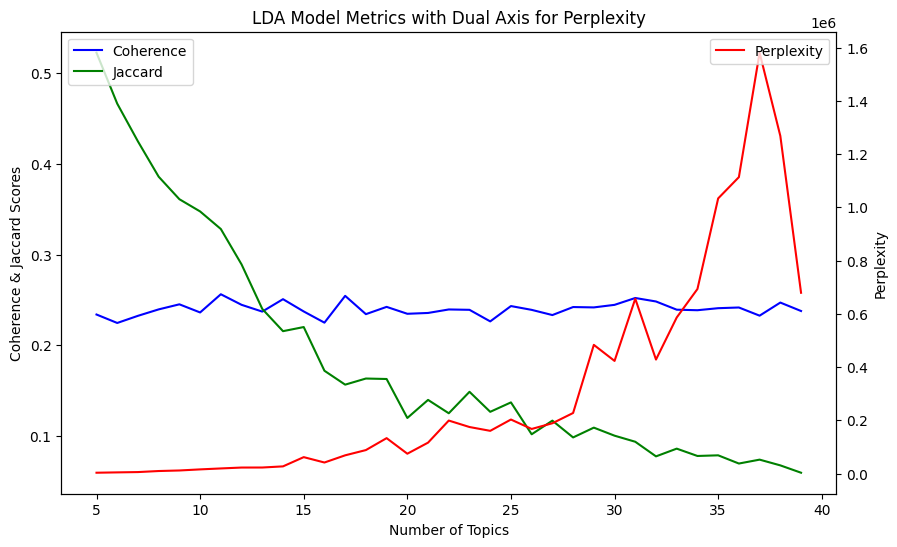

In [ ]:
# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Coherence and Jaccard on the primary y-axis
ax1.plot(results['num_topic'], results['Coherence'], label='Coherence', color='blue')
ax1.plot(results['num_topic'], results['Jaccard'], label='Jaccard', color='green')
ax1.set_xlabel('Number of Topics')
ax1.set_ylabel('Coherence & Jaccard Scores')

# Create a second y-axis for Perplexity
ax2 = ax1.twinx()
ax2.plot(results['num_topic'], results['Perplexity'], label='Perplexity', color='red')
ax2.set_ylabel('Perplexity')

# Adding legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('LDA Model Metrics with Dual Axis for Perplexity')
plt.show()

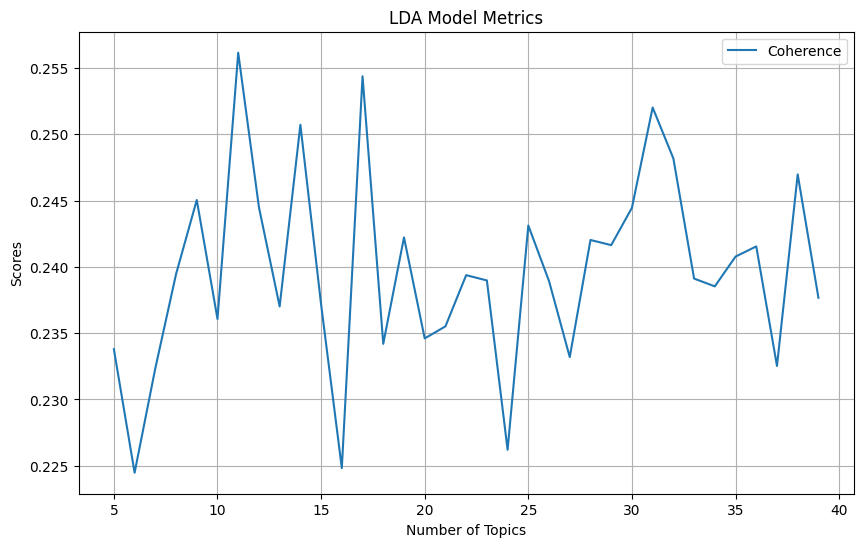

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(results['num_topic'], results['Coherence'], label='Coherence')
#plt.plot(results['num_topic'], results['Jaccard'], label='Jaccard')
#plt.plot(results['num_topic'], results['Perplexity'], label='Perplexity')
plt.xlabel('Number of Topics')
plt.ylabel('Scores')
plt.title('LDA Model Metrics')
plt.grid(True)
plt.legend()
plt.show()



```
coh0 = 0
js0 = 100
ppx0 = 100
num = 1
for topic_num in range (5, 100):
  lda = decomposition.LatentDirichletAllocation (n_components=topic_num, learning_method='online', learning_offset=50, n_jobs=-1, random_state=111)
  # n_components is the number of topics

  w1 = lda.fit_transform (tf_vectors)
  #h1 = lda.components_

  ppx = lda.perplexity(w1,  sub_sampling=False)

  coh = mean (metric_coherence_gensim(measure='c_v', top_n=30, topic_word_distrib=lda.components_, vocab=np.array([x for x in vectorizer_tf.vocabulary_.keys()]), texts=tok))

  l = len (lda.components_)
  n = 0
  js = 0
  for i in range(0, l-1):
    topic1 = [1 if x>1 else 0 for x in lda.components_[i]]
    for j in range(i+1, l):
      topic2 = [1 if x>1 else 0 for x in lda.components_[j]]
      js += jaccard_score (topic1, topic2)
      n += 1
  js /= n

  if js > js0 and coh < coh0 and ppx > ppx0:
    pass
  else:
    num = topic_num
    js0 = js
    coh0 = coh
    ppx0 = ppx

  print ('num_topic: ', topic_num, 'Coherence: ', coh, 'Jaccard: ', js, 'Perplexity: ', ppx)
#print ('BEST: ', 'num_topic: ', num, 'Coherence: ', coh0, 'Jaccard: ', js0, 'Perplexity: ', ppx0)
```



In [ ]:
#XXXXXXXXXXXXXXXXXXXXXXXXX

# Topic Modeling

In [ ]:
import pandas as pd

def get_smallest_topic_with_max_metric(df, metric):
    # Find the max value in the metric column
    max_value = df[metric].max()

    # Filter the DataFrame for rows with this max value
    df_max_value = df[df[metric] == max_value]

    # Get the smallest 'num_topic' in these rows
    topic_num = df_max_value['num_topic'].min()

    return topic_num


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
n_topics = int(get_smallest_topic_with_max_metric(results, 'Coherence'))

n_topics

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


11

In [ ]:
lda = decomposition.LatentDirichletAllocation (n_components=n_topics, learning_method='online', learning_offset=50, n_jobs=-1, random_state=111)
# n_components is the number of topics

w1 = lda.fit_transform (tf_vectors)
h1 = lda.components_

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pickle
with open(f"/content/drive/Othercomputers/My laptop/D:/PROJECT/YORK UNIVERSITY/Immune checkpoint /data_preprocesse/lda_immune_checkpoint_{n_topics}.pk","wb") as f1:
    pickle.dump (lda, f1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pickle
lda = decomposition.LatentDirichletAllocation (n_components=n_topics, learning_method='online', learning_offset=50, n_jobs=-1, random_state=111)
with open(f"/content/drive/Othercomputers/My laptop/D:/PROJECT/YORK UNIVERSITY/Immune checkpoint /data_preprocesse/lda_immune_checkpoint_{n_topics}.pk","rb") as f1:
    lda = pickle.load (f1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#pyLDAvis.enable_notebook()
#pyLDAvis.sklearn.prepare(lda, tf_vectors, vectorizer_tf, mds='tsne')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


What did I do to make this work?

I installed pyLDAvis, but didn't import it!

I went to usr/local/lib/python3.10/dist-packages/pyLDAvis/sklearn.py
and changed get_feature_names() to get_feature_names_out()

saved it!
Then imported pyLDAvis and pyLDAvis.sklearn

In [ ]:
w1 = lda.transform (tf_vectors)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
w1.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(3320, 11)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
text = []
topic = []
probabilit = []
for i in range(len(idx)):
  text.append (str(data[idx[i]]))
  t = np.argmax (w1[i,:])
  topic.append (t)
  probabilit.append (w1[i,t])
probabilities = pd.DataFrame (data= {'Text':text,'Topic':topic,'Probability':probabilit})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print('Topic:','Number:')
for i in range(n_topics):
  print('topic',i,'    ',list(probabilities['Topic']).count(i))

Topic: Number:
topic 0      75
topic 1      222
topic 2      92
topic 3      57
topic 4      419
topic 5      280
topic 6      582
topic 7      721
topic 8      328
topic 9      192
topic 10      352


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# topic similarity matrix

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
## jaccard_similarity

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


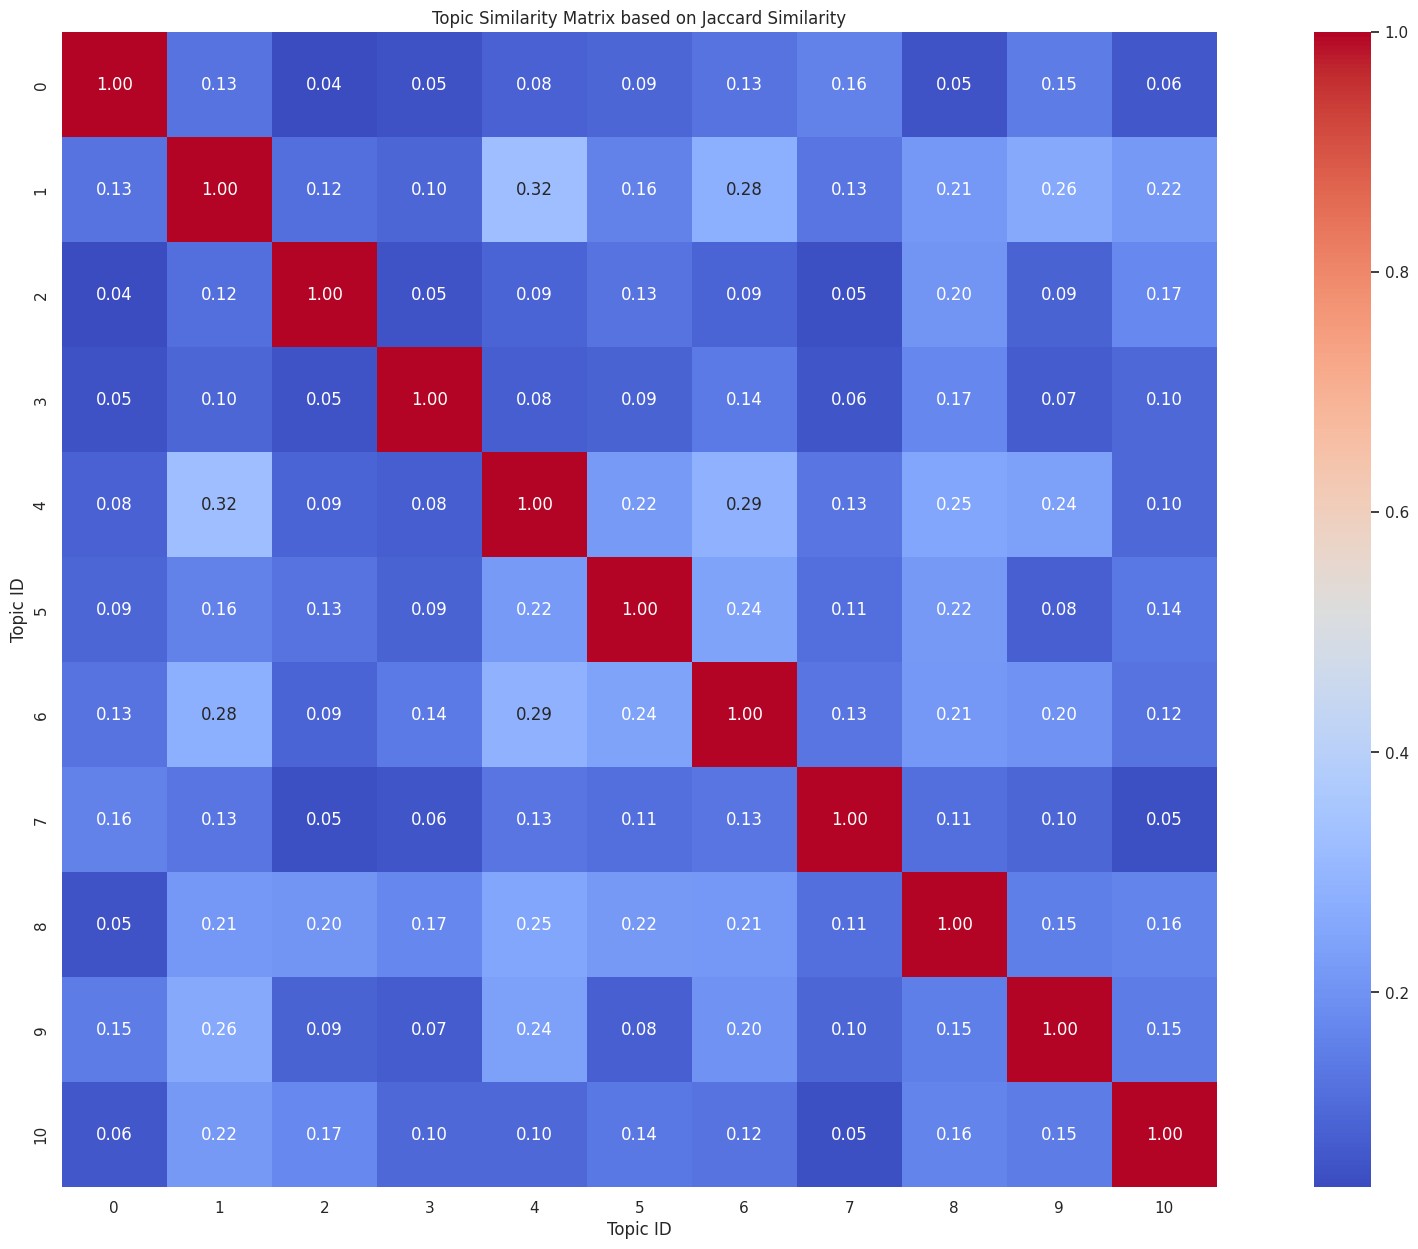

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import LatentDirichletAllocation

def jaccard_similarity(vector1, vector2, threshold=0.01):
    set1 = set(np.where(vector1 > threshold)[0])
    set2 = set(np.where(vector2 > threshold)[0])
    intersection = len(set1.intersection(set2))
    union = len(set1) + len(set2) - intersection
    if union == 0:
        return 0
    else:
        return intersection / union


# Assuming lda is your trained LDA model
# Normalize the topic-word distribution
topic_word_distributions = lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis]

# Number of topics
n_topics = lda.components_.shape[0]

# Create Jaccard Similarity matrix
jaccard_similarity_matrix = np.zeros((n_topics, n_topics))

for i in range(n_topics):
    for j in range(n_topics):
        jaccard_similarity_matrix[i, j] = jaccard_similarity(topic_word_distributions[i, :], topic_word_distributions[j, :], threshold=0.01)


# Plot Heatmap
plt.figure(figsize=(25, 15))
sns.set(font_scale=1)
sns.heatmap(
    jaccard_similarity_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    square=True,
    annot_kws={"size": 12}
)
plt.title("Topic Similarity Matrix based on Jaccard Similarity")
plt.xlabel("Topic ID")
plt.ylabel("Topic ID")

# Save the figure
plt.savefig(f'/content/drive/Othercomputers/My laptop/D:/PROJECT/YORK UNIVERSITY/Immune checkpoint /data_preprocesse/topic_similarity_matrix_jaccard_immune_checkpoint.png', dpi=600)

plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-133-c8adf837f1e1>:31: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(1 - jaccard_similarity_matrix, method="average")


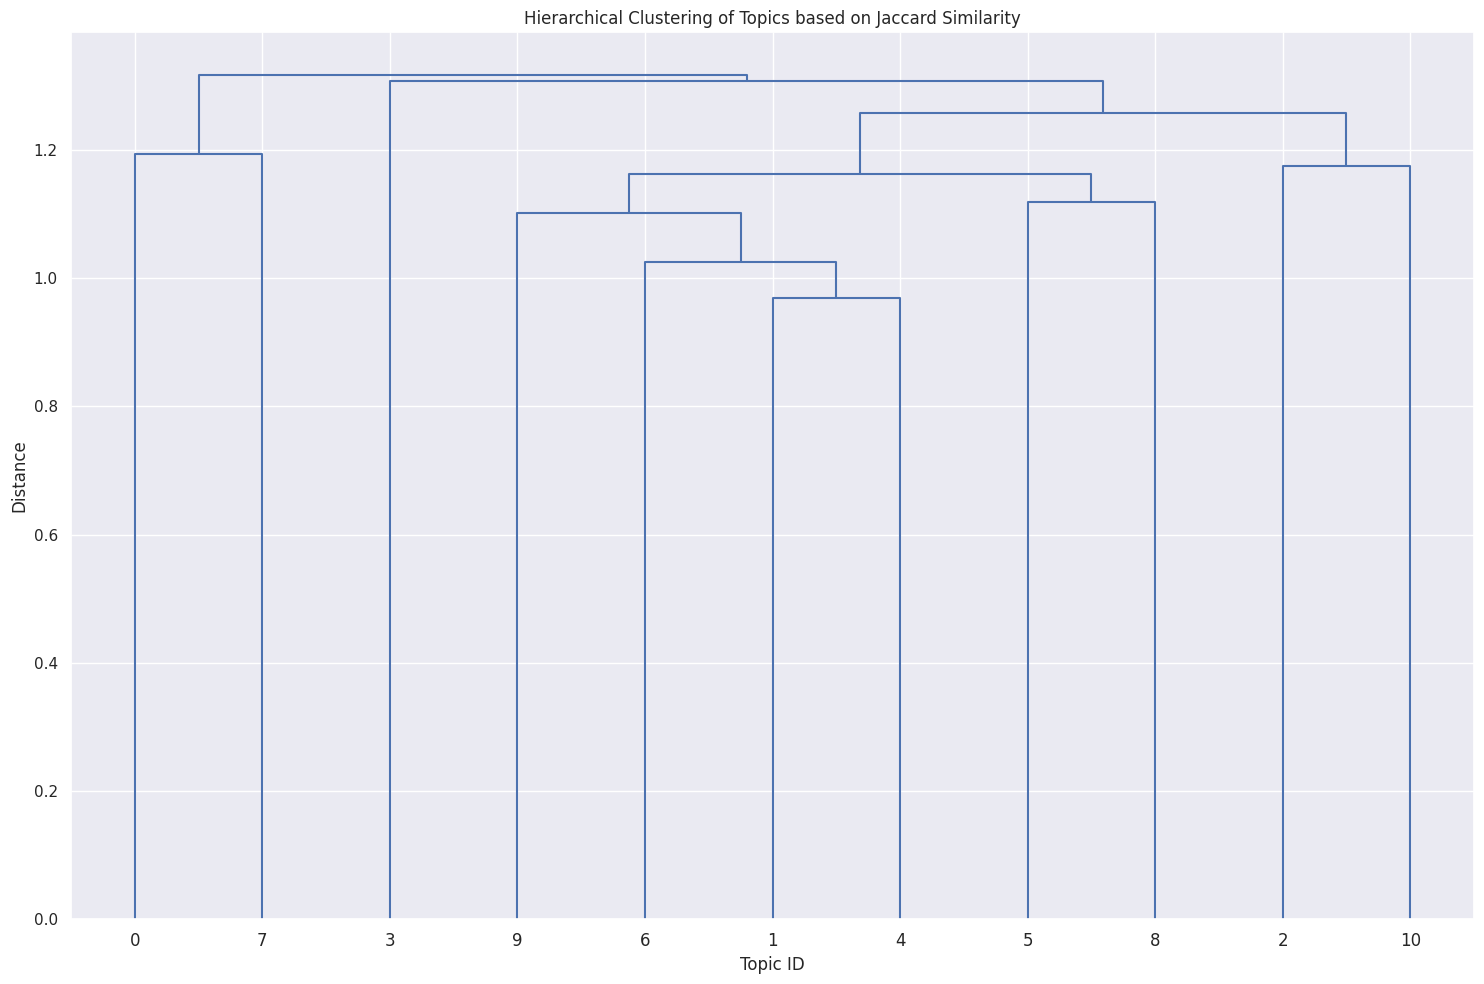

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.decomposition import LatentDirichletAllocation

# Define Jaccard Similarity function
def jaccard_similarity(vector1, vector2, threshold=0.01):
    set1 = set(np.where(vector1 > threshold)[0])
    set2 = set(np.where(vector2 > threshold)[0])
    intersection = len(set1.intersection(set2))
    union = len(set1) + len(set2) - intersection
    if union == 0:
        return 0
    else:
        return intersection / union


# Assuming lda is your trained LDA model
n_topics = lda.components_.shape[0]
topic_word_distributions = lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis]

# Create Jaccard Similarity matrix
jaccard_similarity_matrix = np.zeros((n_topics, n_topics))

for i in range(n_topics):
    for j in range(n_topics):
        jaccard_similarity_matrix[i, j] = jaccard_similarity(topic_word_distributions[i, :], topic_word_distributions[j, :], threshold=0.01)

# Perform hierarchical clustering
linkage_matrix = linkage(1 - jaccard_similarity_matrix, method="average")

# Plot the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(linkage_matrix, color_threshold=0.5)
plt.title("Hierarchical Clustering of Topics based on Jaccard Similarity")
plt.xlabel("Topic ID")
plt.ylabel("Distance")
plt.tight_layout()

# Save the figure in high resolution
plt.savefig(f'/content/drive/Othercomputers/My laptop/D:/PROJECT/YORK UNIVERSITY/Immune checkpoint /data_preprocesse/topic_clustering_dendrogram_jaccard_immune_checkpoint.png', dpi=600)

plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# get_top_keywords

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def get_top_keywords(lda_model, vectorizer, n_words=50):
    terms = vectorizer.get_feature_names_out()
    topic_keywords = []

    for topic_idx, topic in enumerate(lda.components_):
        top_keywords_idx = topic.argsort()[::-1][:n_words]
        top_keywords = [(terms[i], topic[i]) for i in top_keywords_idx]
        topic_keywords.append(top_keywords)

    return topic_keywords

top_keywords = get_top_keywords(lda, vectorizer_tf, n_words=50)

# To display the topics with their keywords and scores
with open(f"/content/drive/Othercomputers/My laptop/D:/PROJECT/YORK UNIVERSITY/Immune checkpoint /data_preprocesse/top_keywords_immune_checkpoint.txt", "w") as f:
    for idx, keywords in enumerate(top_keywords):
        f.write(f"Topic {idx}:\n")
        print(f"Topic {idx}:")
        for word, score in keywords:
            f.write(f"{word}, ")
            print(f"{word}", end=", ")
        f.write("\n\n")
        print("\n")

Topic 0:
acid, molecule, sequence, amino, polypeptide, nucleic, invention, encode, death, ligand, method, protein, comprise, show, formulation, derivative, present, stable, composition, cell, pharmaceutical, program, vector, host, programmed, bind, region, disclosure, disclose, contain, relate, application, functional, produce, receptor, include, small, make, chain, capable, inhibit, interaction, structure, consist, provide, disease, production, select, construct, modify, 

Topic 1:
composition, pharmaceutical, inhibitor, immune, checkpoint, comprise, cancer, invention, present, treat, active, anticancer, relate, effect, treatment, anti, tumor, combination, prevent, ingredient, contain, component, combine, provide, type, prevention, inhibit, exhibit, administration, increase, kit, carrier, include, product, excellent, colorectal, form, enhance, antibody, synergistic, activity, method, formulation, growth, extracellular, receptor, administer, inhibition, pd1, therapy, 

Topic 2:
gene, l

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Emergent topics

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


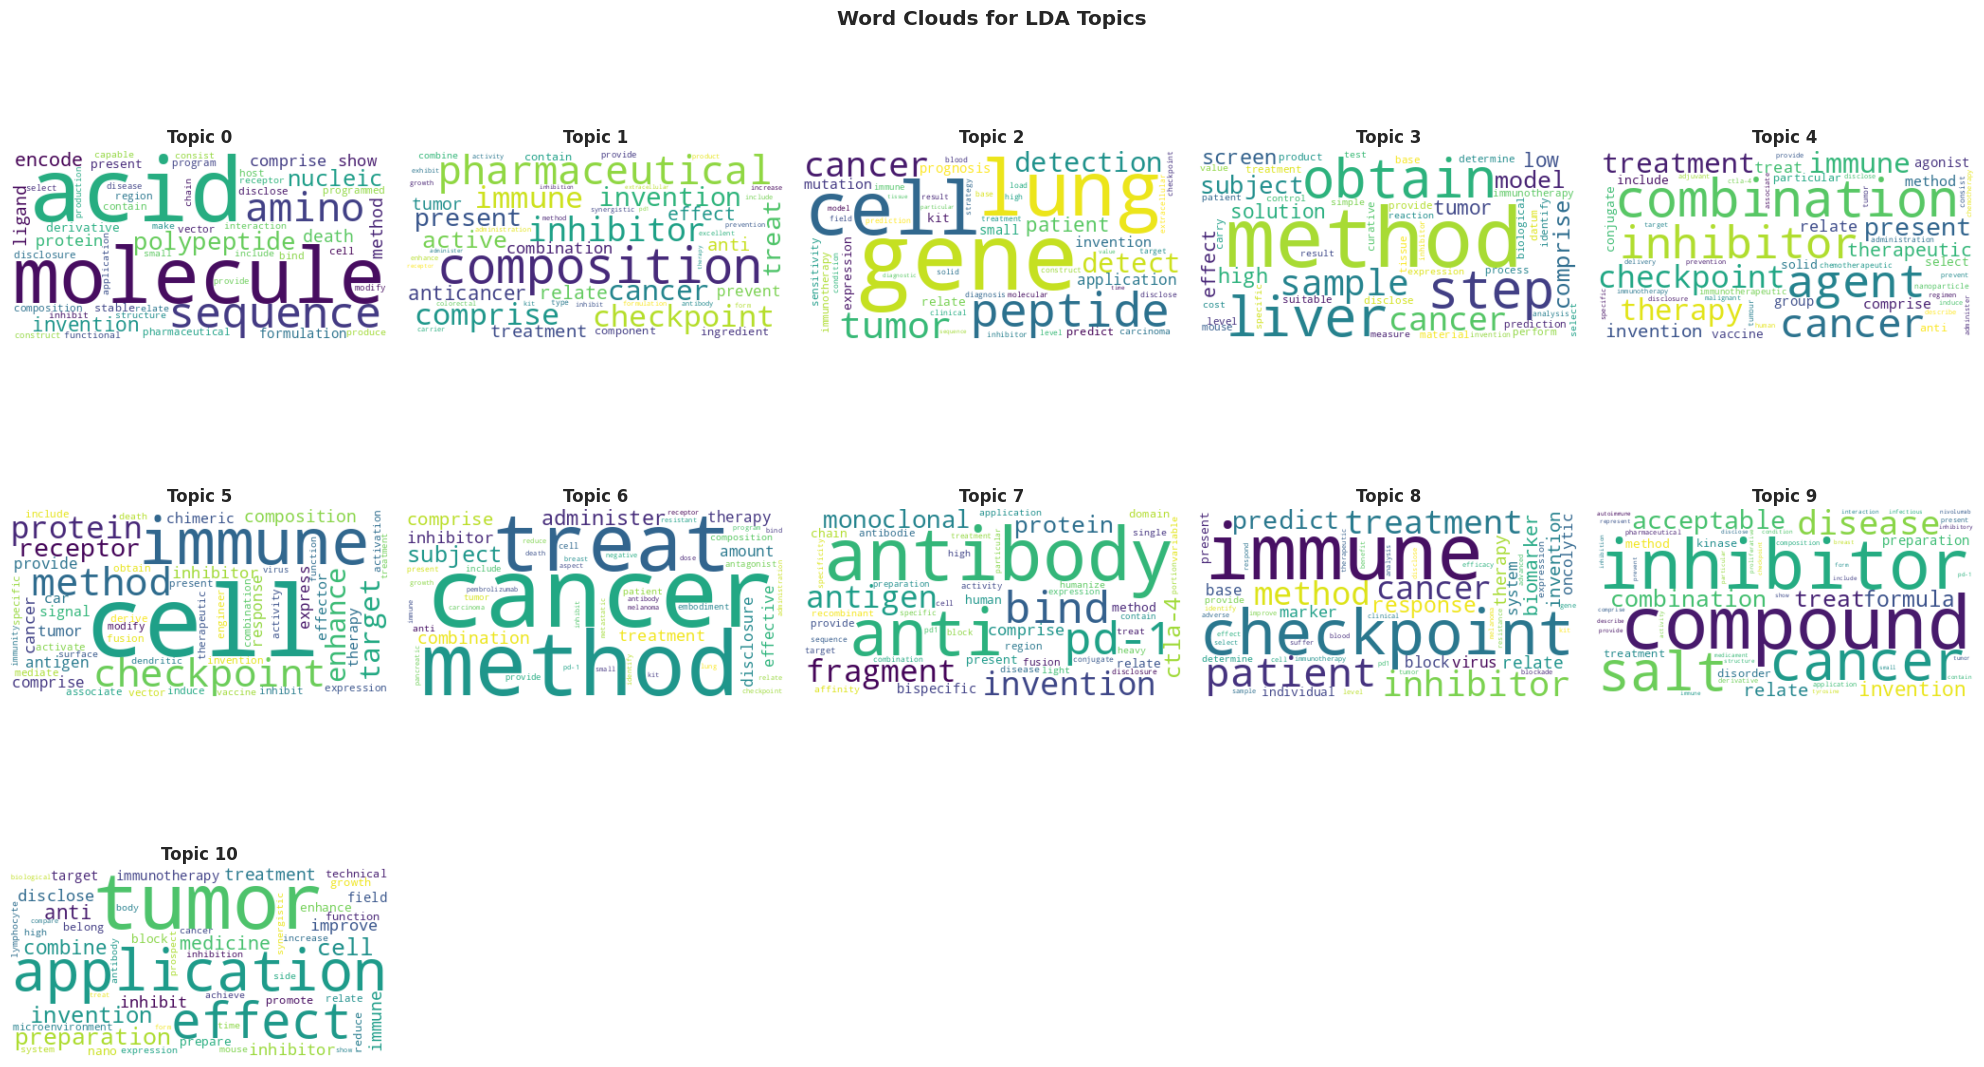

In [ ]:
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt

# Word Clouds for topics
def plot_wordcloud(lda, topic_id, ax, n_words=50):
    terms = vectorizer_tf.get_feature_names_out()
    word_probs = {terms[i]: prob for i, prob in enumerate(lda.components_[topic_id])}
    wc = WordCloud(background_color='white', max_words=n_words).generate_from_frequencies(word_probs)
    ax.imshow(wc, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f"Topic {topic_id}", fontweight='bold')  # Bold title for each subplot

# Assuming n_topics to be the number of topics you've chosen
n_topics = n_topics  # Make sure this matches the number of topics in lda_model

# Calculate the number of rows needed
n_rows = int(np.ceil(n_topics / 5))

fig, axes = plt.subplots(n_rows, 5, figsize=(20, 4 * n_rows))

# Flatten the array and truncate it to match the number of topics
axes_flat = axes.flatten()[:n_topics]

for ax, topic_id in zip(axes_flat, range(n_topics)):
    plot_wordcloud(lda, topic_id, ax)

# Remove extra subplots
for idx in range(n_topics, len(axes.flatten())):
    fig.delaxes(axes.flatten()[idx])

plt.suptitle("Word Clouds for LDA Topics", fontweight='bold')  # Bold main title
plt.tight_layout()
plt.savefig(f'/content/drive/Othercomputers/My laptop/D:/PROJECT/YORK UNIVERSITY/Immune checkpoint /data_preprocesse/wordclouds_immune_checkpoint.png', dpi=600)  # Use raw string for path
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Attach Discovered Topic Labels to Original scholar publications

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
final_topics = lda.transform(tf_vectors)
final_topics.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(3320, 11)

In [ ]:
df_filtered["Topic N°"] = final_topics.argmax(axis=1)
df_filtered.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,,#,Jurisdiction,Kind,Display Key,Publication Date,Application Number,Application Date,Priority Numbers,Earliest Priority Date,Title,Abstract,Applicants,Inventors,Owners,URL,Document Type,Has Full Text,Cites Patent Count,Cited by Patent Count,Simple Family Size,Extended Family Size,Sequence Count,CPC Classifications,IPCR Classifications,US Classifications,NPL Citation Count,NPL Resolved Citation Count,NPL Resolved Lens ID(s),NPL Resolved External ID(s),NPL Citations,Legal Status,Cleaned_Text,Topic N°
Lens ID,Publication Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
197-733-628-711-768,2021,1,TW,A,TW 202114659 A,2021-04-16,TW 109133847 A,2020-09-29,EP 19201152 A,2019-10-02,"Combination comprising HDAC inhibitor, CTLA-4 ...",The invention relates to medical uses of an HD...,4SC AG,HAMM SVETLANA;;HERMANN FRANK,NaN,https://lens.org/197-733-628-711-768,Patent of Addition,no,0,0,2,2,0,A61K45/06;;A61P35/00;;A61K31/4155,A61K31/4155;;A61K39/395;;A61K45/06;;A61P35/00,NaN,0,0,NaN,NaN,NaN,PENDING,"combination comprising hdac inhibitor, ctla-4 ...",4
023-616-950-865-48X,2022,2,WO,A1,WO 2022/056572 A1,2022-03-24,AU 2020/050994 W,2020-09-18,AU 2020/050994 W,2020-09-18,TREATMENT OF SOLID TUMOURS,The present invention relates to a method for ...,OLIVIA NEWTON JOHN CANCER RES INSTITUTE,POH ASHLEIGH REN-YI;;ERNST MATTHIAS ROBERT WALTER,NaN,https://lens.org/023-616-950-865-48X,Patent Application,yes,3,0,1,2,0,A61K31/506;;A61K2300/00;;A61K31/519;;A61K9/001...,A61K31/506;;A61K31/519;;A61K39/395;;A61P35/00;...,NaN,2,2,011-457-792-548-92X;;048-229-382-653-004,29955905;;10.1007/s00018-018-2863-3;;pmc638240...,"YU, G.-T. ET AL.: ""Inhibition of SRC family ki...",PENDING,treatment solid tumoursthe present invention r...,6
094-569-953-648-612,2021,3,CN,A,CN 112512579 A,2021-03-16,CN 201980049832 A,2019-09-27,CN 201811147946 A;;CN 201910467950 A;;CN 20191...,2018-09-29,USE OF COMBINATION OF TLR AGONIST AND IMMUNE C...,Use of a combination of a TLR agonist and an i...,JIANGSU HENGRUI MEDICINE CO;;SUZHOU SHENGDIYA ...,JIANG JIAHUA;;YANG CHANGYONG;;LIAO CHENG;;ZHAN...,NaN,https://lens.org/094-569-953-648-612,Patent Application,no,3,0,3,3,0,A61K39/395;;A61P35/00;;A61K31/395;;C07D471/04,A61K39/395;;A61K31/395;;A61P35/00;;C07D471/04,NaN,0,0,NaN,NaN,NaN,PENDING,combination tlr agonist immune checkpoint inhi...,4
143-969-408-220-424,2021,4,CN,A,CN 112512580 A,2021-03-16,CN 201980049896 A,2019-09-27,CN 201811149357 A;;CN 201811547685 A;;CN 20191...,2018-09-29,USE OF EZH2 INHIBITOR IN COMBINATION WITH IMMU...,Disclosed is the use of an EZH2 inhibitor in c...,JIANGSU HENGRUI MEDICINE CO;;SUZHOU SHENGDIYA ...,ZHANG LAN;;JIANG JIAHUA;;LIAO CHENG;;ZHANG LIA...,NaN,https://lens.org/143-969-408-220-424,Patent Application,no,2,1,3,3,0,A61K31/4433;;A61K31/4545;;A61K31/496;;A61K31/5...,A61K39/395;;A61K31/4433;;A61K31/4545;;A61K31/4...,NaN,0,0,NaN,NaN,NaN,PENDING,ezh2 inhibitor combination immune checkpoint i...,4
194-887-353-832-386,2019,5,WO,A8,WO 2019/156568 A8,2019-10-03,NL 2019050092 W,2019-02-12,NL 2020422 A,2018-02-12,METHODS FOR PREDICTING TREATMENT OUTCOME AND/O...,The present invention relates to the field of ...,STICHTING HET NEDERLANDS KANKER INST ANTONI VA...,SCHUMACHER ANTONIUS NICOLAAS MARIA;;ZIPPELIUS ...,NaN,https://lens.org/194-887-353-832-386,Amended Application,yes,0,0,3,3,0,G01N33/57423;;G01N2333/70532,G01N33/574,NaN,0,0,NaN,NaN,NaN,PENDING,methods predicting treatment outcome and/or se...,4


In [ ]:
# Save data to CSV and Pickle formats
df_filtered.to_csv(f'/content/drive/Othercomputers/My laptop/D:/PROJECT/YORK UNIVERSITY/Immune checkpoint /data_preprocesse/topic_probability_immune_checkpoint.csv', index=False)
df_filtered.to_pickle(f'/content/drive/Othercomputers/My laptop/D:/PROJECT/YORK UNIVERSITY/Immune checkpoint /data_preprocesse/topic_probability_immune_checkpoint.pkl')

df_filtered.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,,#,Jurisdiction,Kind,Display Key,Publication Date,Application Number,Application Date,Priority Numbers,Earliest Priority Date,Title,Abstract,Applicants,Inventors,Owners,URL,Document Type,Has Full Text,Cites Patent Count,Cited by Patent Count,Simple Family Size,Extended Family Size,Sequence Count,CPC Classifications,IPCR Classifications,US Classifications,NPL Citation Count,NPL Resolved Citation Count,NPL Resolved Lens ID(s),NPL Resolved External ID(s),NPL Citations,Legal Status,Cleaned_Text,Topic N°
Lens ID,Publication Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
197-733-628-711-768,2021,1,TW,A,TW 202114659 A,2021-04-16,TW 109133847 A,2020-09-29,EP 19201152 A,2019-10-02,"Combination comprising HDAC inhibitor, CTLA-4 ...",The invention relates to medical uses of an HD...,4SC AG,HAMM SVETLANA;;HERMANN FRANK,NaN,https://lens.org/197-733-628-711-768,Patent of Addition,no,0,0,2,2,0,A61K45/06;;A61P35/00;;A61K31/4155,A61K31/4155;;A61K39/395;;A61K45/06;;A61P35/00,NaN,0,0,NaN,NaN,NaN,PENDING,"combination comprising hdac inhibitor, ctla-4 ...",4
023-616-950-865-48X,2022,2,WO,A1,WO 2022/056572 A1,2022-03-24,AU 2020/050994 W,2020-09-18,AU 2020/050994 W,2020-09-18,TREATMENT OF SOLID TUMOURS,The present invention relates to a method for ...,OLIVIA NEWTON JOHN CANCER RES INSTITUTE,POH ASHLEIGH REN-YI;;ERNST MATTHIAS ROBERT WALTER,NaN,https://lens.org/023-616-950-865-48X,Patent Application,yes,3,0,1,2,0,A61K31/506;;A61K2300/00;;A61K31/519;;A61K9/001...,A61K31/506;;A61K31/519;;A61K39/395;;A61P35/00;...,NaN,2,2,011-457-792-548-92X;;048-229-382-653-004,29955905;;10.1007/s00018-018-2863-3;;pmc638240...,"YU, G.-T. ET AL.: ""Inhibition of SRC family ki...",PENDING,treatment solid tumoursthe present invention r...,6
094-569-953-648-612,2021,3,CN,A,CN 112512579 A,2021-03-16,CN 201980049832 A,2019-09-27,CN 201811147946 A;;CN 201910467950 A;;CN 20191...,2018-09-29,USE OF COMBINATION OF TLR AGONIST AND IMMUNE C...,Use of a combination of a TLR agonist and an i...,JIANGSU HENGRUI MEDICINE CO;;SUZHOU SHENGDIYA ...,JIANG JIAHUA;;YANG CHANGYONG;;LIAO CHENG;;ZHAN...,NaN,https://lens.org/094-569-953-648-612,Patent Application,no,3,0,3,3,0,A61K39/395;;A61P35/00;;A61K31/395;;C07D471/04,A61K39/395;;A61K31/395;;A61P35/00;;C07D471/04,NaN,0,0,NaN,NaN,NaN,PENDING,combination tlr agonist immune checkpoint inhi...,4
143-969-408-220-424,2021,4,CN,A,CN 112512580 A,2021-03-16,CN 201980049896 A,2019-09-27,CN 201811149357 A;;CN 201811547685 A;;CN 20191...,2018-09-29,USE OF EZH2 INHIBITOR IN COMBINATION WITH IMMU...,Disclosed is the use of an EZH2 inhibitor in c...,JIANGSU HENGRUI MEDICINE CO;;SUZHOU SHENGDIYA ...,ZHANG LAN;;JIANG JIAHUA;;LIAO CHENG;;ZHANG LIA...,NaN,https://lens.org/143-969-408-220-424,Patent Application,no,2,1,3,3,0,A61K31/4433;;A61K31/4545;;A61K31/496;;A61K31/5...,A61K39/395;;A61K31/4433;;A61K31/4545;;A61K31/4...,NaN,0,0,NaN,NaN,NaN,PENDING,ezh2 inhibitor combination immune checkpoint i...,4
194-887-353-832-386,2019,5,WO,A8,WO 2019/156568 A8,2019-10-03,NL 2019050092 W,2019-02-12,NL 2020422 A,2018-02-12,METHODS FOR PREDICTING TREATMENT OUTCOME AND/O...,The present invention relates to the field of ...,STICHTING HET NEDERLANDS KANKER INST ANTONI VA...,SCHUMACHER ANTONIUS NICOLAAS MARIA;;ZIPPELIUS ...,NaN,https://lens.org/194-887-353-832-386,Amended Application,yes,0,0,3,3,0,G01N33/57423;;G01N2333/70532,G01N33/574,NaN,0,0,NaN,NaN,NaN,PENDING,methods predicting treatment outcome and/or se...,4


In [ ]:
df_filtered['Topic N°'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


7     721
6     582
4     419
10    352
8     328
5     280
1     222
9     192
2      92
0      75
3      57
Name: Topic N°, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Frequency Counting

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Step 1: Group data by 'Publication Year' and 'topic', then count occurrences
topic_counts_by_year = df_filtered.reset_index().groupby(['Publication Year', 'Topic N°']).size().unstack(fill_value=0)

# Step 2: Calculate the total count of each topic
total_counts = topic_counts_by_year.sum()

# Step 3: Sort columns by total count
sorted_columns = total_counts.sort_values(ascending=False).index
topic_counts_by_year = topic_counts_by_year[sorted_columns]

# Step 4: Add a row with the total count of each topic
topic_counts_by_year.loc['Total'] = total_counts.loc[sorted_columns]

# Save the DataFrame to CSV and pickle files
topic_counts_by_year.to_csv(f'/content/drive/Othercomputers/My laptop/D:/PROJECT/YORK UNIVERSITY/Immune checkpoint /data_preprocesse/topic_counts_by_year_immune_checkpoint.csv')
topic_counts_by_year.to_pickle(f'/content/drive/Othercomputers/My laptop/D:/PROJECT/YORK UNIVERSITY/Immune checkpoint /data_preprocesse/topic_counts_by_year_immune_checkpoint.pkl')

# This will give you a DataFrame where each row is a year (plus a 'Total' row at the bottom),
# and each column is the count of documents associated with a topic for that year (and the total count).

# Display the updated DataFrame
topic_counts_by_year

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic N°,7,6,4,10,8,5,1,9,2,0,3
Publication Year,,,,,,,,,,,
1999,0,0,1,0,0,2,0,0,0,0,0
2000,0,0,0,0,0,0,1,0,0,0,0
2002,1,0,0,0,1,0,0,0,0,0,0
2005,0,1,0,0,0,0,0,0,0,0,0
2006,1,1,0,0,0,1,0,0,0,0,0
2007,2,0,1,0,1,0,0,0,0,0,0
2008,1,1,1,0,1,0,0,0,0,0,0
2009,1,0,2,2,1,0,0,1,0,0,0
2010,2,0,1,0,0,1,1,0,0,1,0


In [ ]:
topic_counts_by_year.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(24, 11)

In [ ]:
# Evolution Curve for Each Topic

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


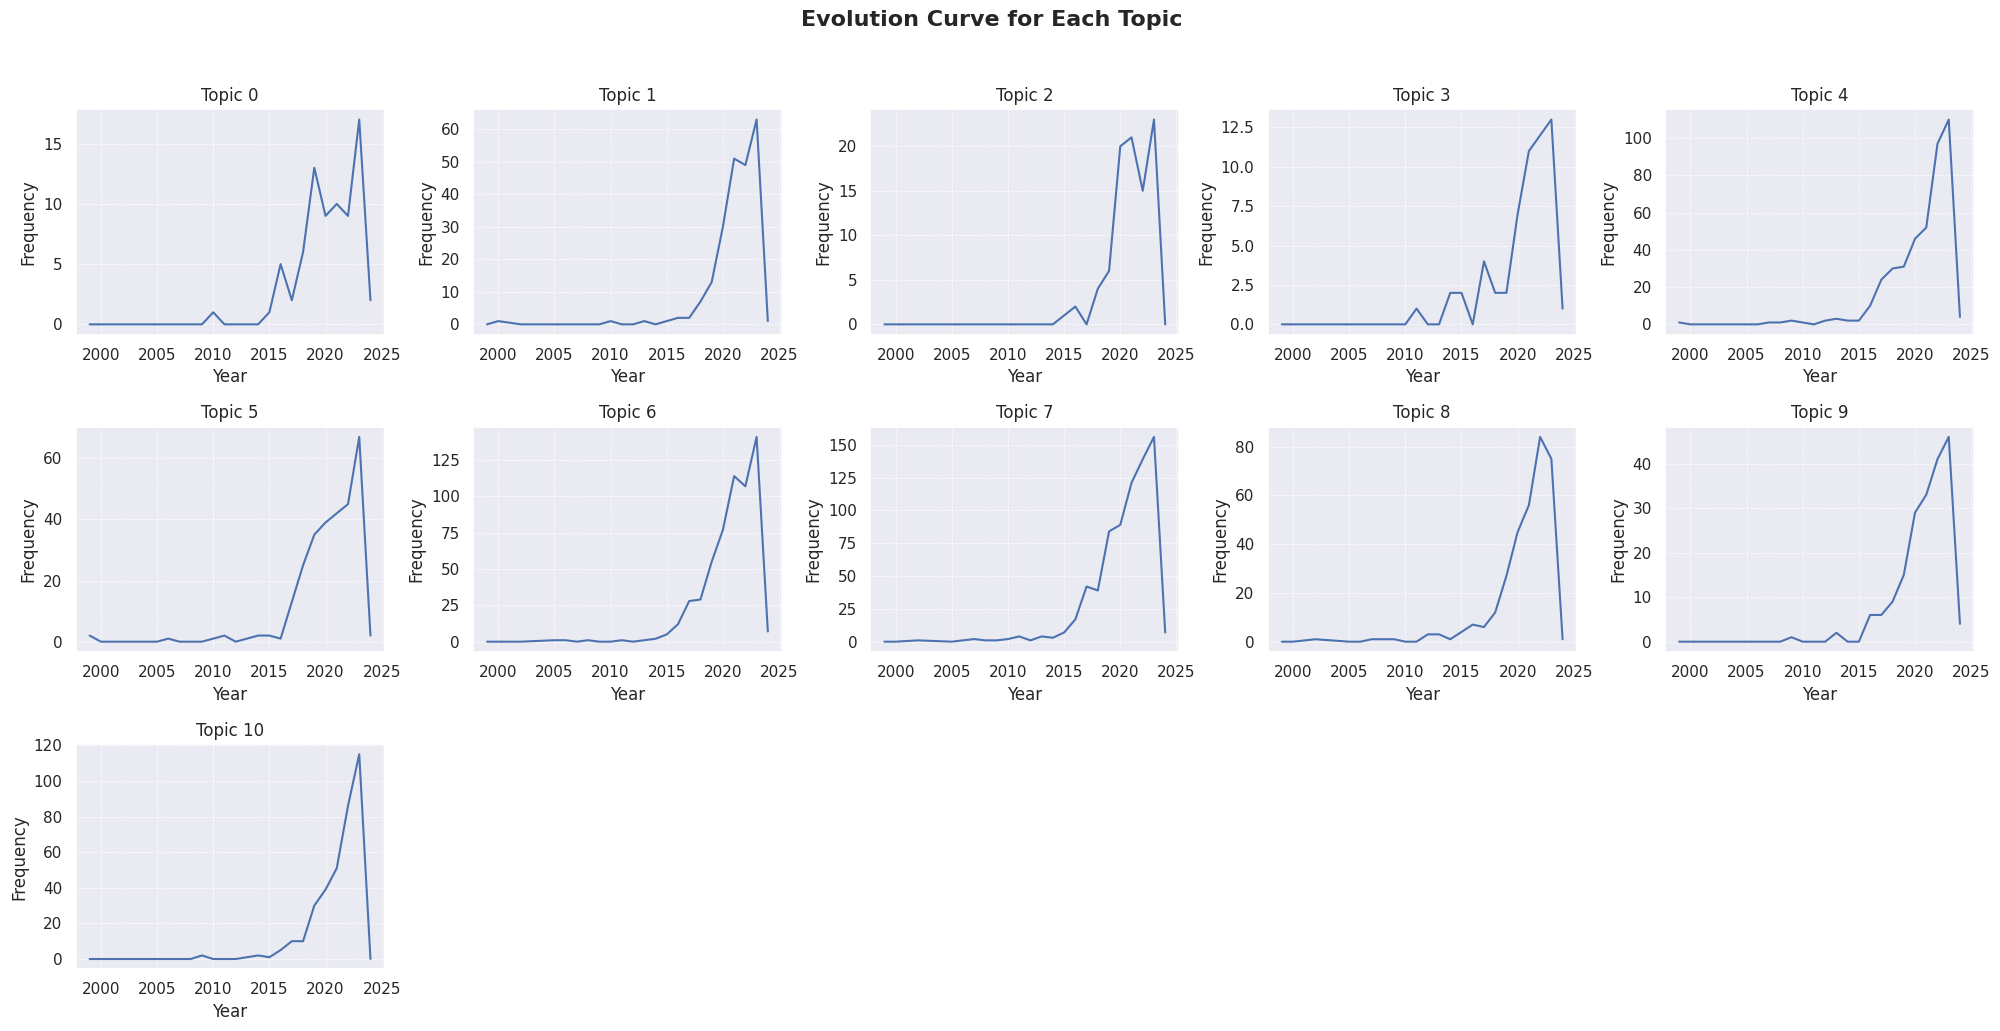

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the DataFrame from the CSV file (assuming it's stored as 'topic_counts_by_year.csv')
# Replace this line with your actual data if it's not in a CSV
#topic_counts_by_year = pd.read_csv('topic_counts_by_year.csv', index_col='Publication Year')

# Remove the 'Total' row if it exists
if 'Total' in topic_counts_by_year.index:
    topic_counts_by_year = topic_counts_by_year.drop(index=['Total'])

# Sort columns by topic name
topic_counts_by_year = topic_counts_by_year.sort_index(axis=1)

# Define the number of topics (make sure this matches your data)
n_topics = len(topic_counts_by_year.columns)

# Calculate the number of rows needed for subplots
n_rows = (n_topics + 4) // 5  # +4 for rounding up

# Create a grid of subplots
fig, axes = plt.subplots(n_rows, 5, figsize=(20, n_rows * 3.5))

# Flatten the array to easily iterate over it
axes_flat = axes.flatten()

# Loop through each topic and plot its curve on a separate subplot
for i, topic in enumerate(topic_counts_by_year.columns):
    axes_flat[i].plot(
        topic_counts_by_year.index,
        topic_counts_by_year[topic]
    )
    axes_flat[i].set_title(f'Topic {topic}')
    axes_flat[i].set_xlabel('Year')
    axes_flat[i].set_ylabel('Frequency')
    axes_flat[i].grid(True, which='both', linestyle='--', linewidth=0.5)

# Remove extra subplots
for i in range(n_topics, len(axes_flat)):
    fig.delaxes(axes_flat[i])

# Add a main title for the entire figure
fig.suptitle('Evolution Curve for Each Topic', fontsize=16, fontweight='bold')

# Save the figure
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Make room for the main title
plt.savefig(f'/content/drive/Othercomputers/My laptop/D:/PROJECT/YORK UNIVERSITY/Immune checkpoint /data_preprocesse/topic_evolution_curves_subplot_ordered_immune_checkpoint.png', dpi=600)

# Show the figure
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Temporal Heatmaps: Display how topic proportions change over time.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


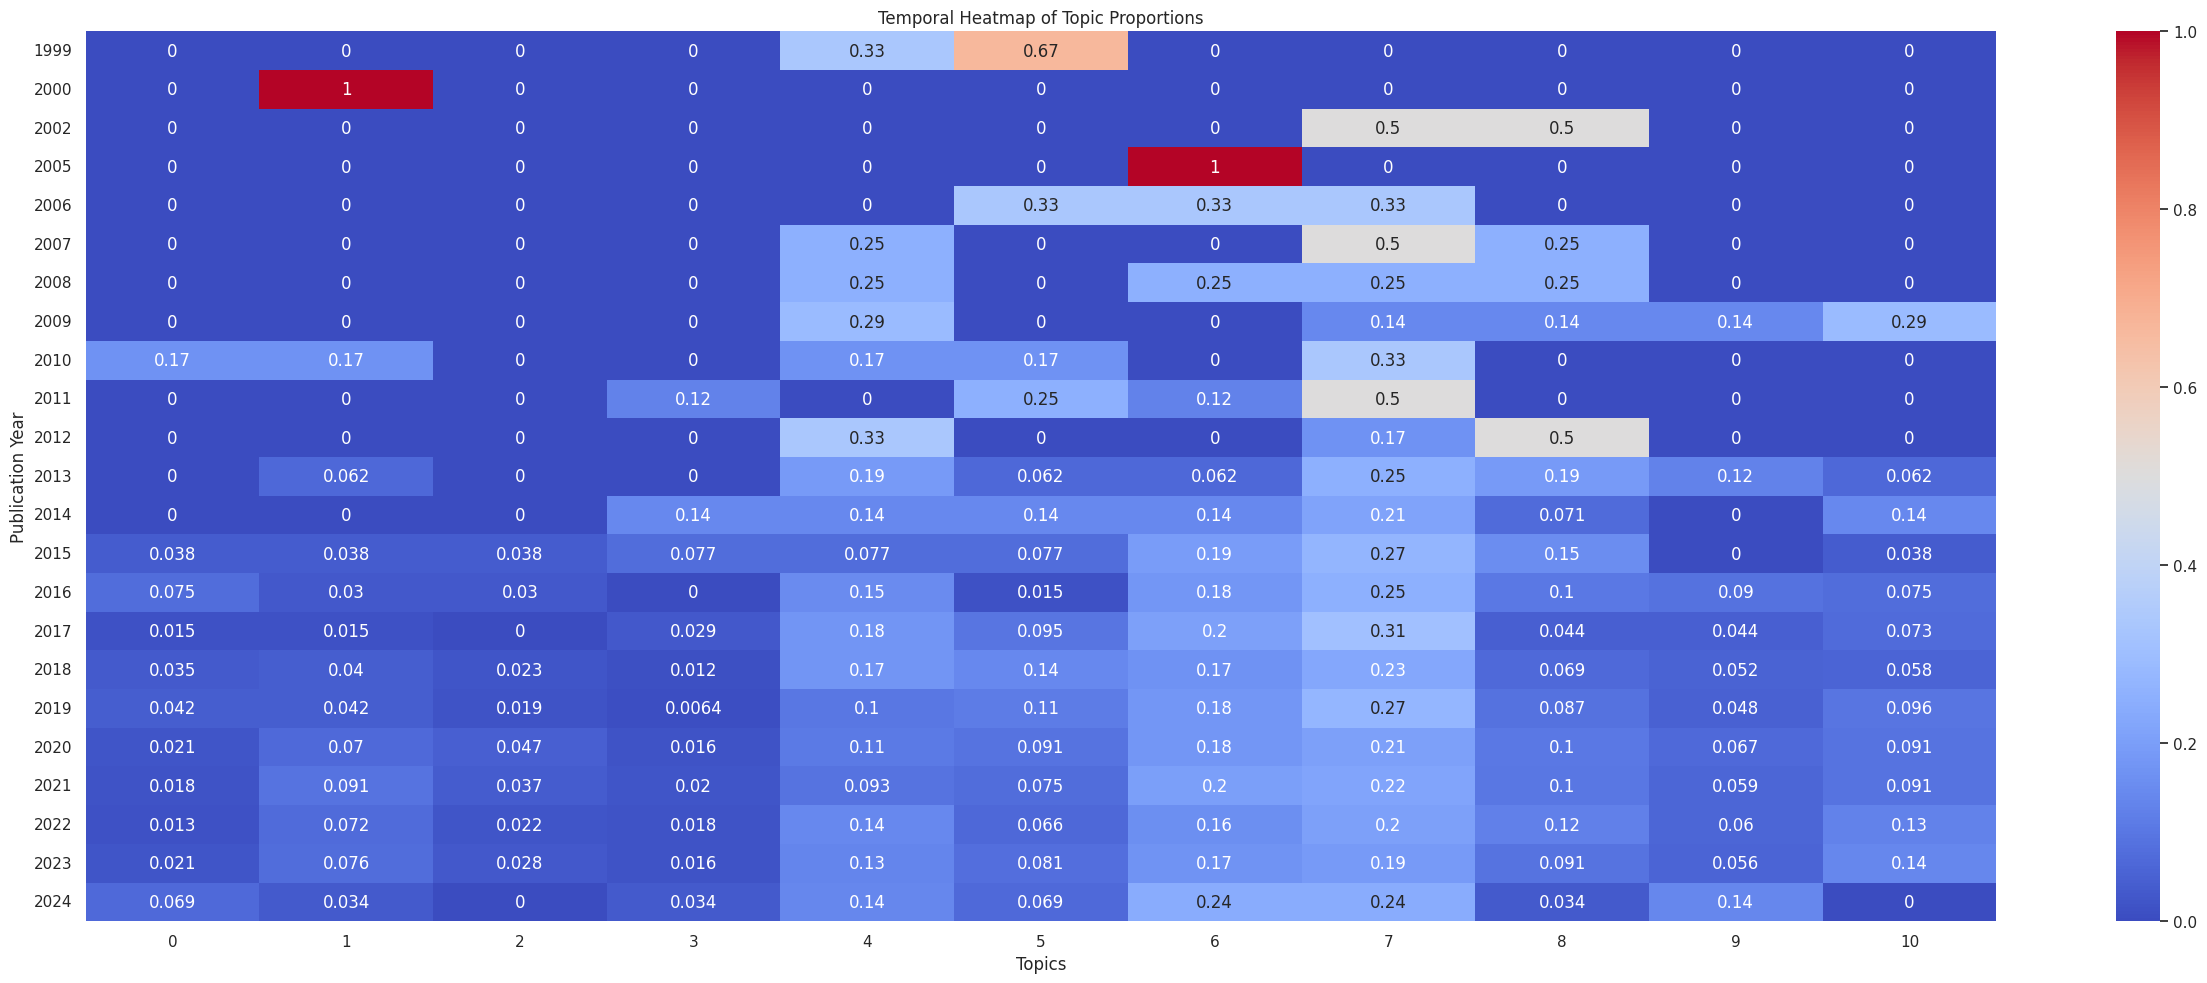

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Assume you already have topic_counts_by_year DataFrame

# Remove the 'Total' row if it exists
if 'Total' in topic_counts_by_year.index:
    topic_counts_by_year = topic_counts_by_year.drop(index=['Total'])

# Sort columns by topic name
topic_counts_by_year = topic_counts_by_year.sort_index(axis=1)

# Calculate the total count for each year (row-wise sum)
total_counts_by_year = topic_counts_by_year.sum(axis=1)

# Normalize frequencies to get proportions
proportions_by_year = topic_counts_by_year.divide(total_counts_by_year, axis=0)

# Create the heatmap
plt.figure(figsize=(25, 10))
sns.heatmap(proportions_by_year.fillna(0), annot=True, cmap="coolwarm", cbar=True, xticklabels=True, yticklabels=True)

# Add labels and title
plt.title('Temporal Heatmap of Topic Proportions')
plt.xlabel('Topics')
plt.ylabel('Publication Year')

# Save the figure
plt.tight_layout()
plt.savefig(f"/content/drive/Othercomputers/My laptop/D:/PROJECT/YORK UNIVERSITY/Immune checkpoint /data_preprocesse/temporal_heatmap_topic_proportions_immune_checkpoint.png")  # Save the plot to a PNG file

# Show the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
